# MTH9879 Homework 7
## JOSE FERREIRA (R VERSION 3.5.2)
Assigned: March 21, 2019.
Due: April 4, 2019 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Yassine Ghalane (yassine.ghalem@gmail.com), Victor Istrakov (stavka@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs.

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

The proof is analog to the argument outline for Bouchaud's power law in the Lecture Notes.
\begin{eqnarray*}
\mbox{Var}[X_{t+\tau}-X_t] &=& \mbox{Var}\left[\sum_{i=1}^{t+\tau}\,\epsilon_i\,-\sum_{i=1}^{t}\,\epsilon_i\,\right]\\
&=& \mbox{Var}\left[\sum_{i=t+1}^{t+\tau}\,\epsilon_i\,\right]\\
&=& \mbox{Var}\left[\sum_{j=1}^{\tau}\,\epsilon_j\,\right]\\
&=& \sum_{i=1}^{\tau} Var(\epsilon_j) + 2\sum_{i \lt j} Cov(\epsilon_i,\epsilon_j)\\
&=& \tau Var(\epsilon_j) + 2\sum_{i \lt j} Cov(\epsilon_i,\epsilon_j)\\
&\approx& \tau Var(\epsilon_j) + \frac{2\,C_1}{(2-\alpha)\,(1-\alpha)} \tau^{2-\alpha}\\
&\sim& \tau^{2-\alpha} \textrm{ as } \tau \to \infty\\
&=& \tau^{2H} \text { since  } H=1-\frac{\alpha}{2}\\
\end{eqnarray*}

## MSFT data from Alejandro Ca&ntilde;ete

### Set up R environment

In [2]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [3]:
head(msft130311.inet)

signed.shares,trade.price
-40,27.91
542309,27.91
2,27.94
16,27.94
84,27.94
-900,27.91


### 2. (6 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.


In [4]:
signFromVolume <- function(volume)
{
    if (volume >= 0)
    {
        return(1)    
    }
    else
    {
        return(-1)
    }
}        

tradeSign <- sapply(msft130311.inet$signed.shares, signFromVolume)
ts <- cbind(msft130311.inet, tradeSign)
colnames(ts) <- c(colnames(msft130311.inet), "SIGN")
head(ts)

signed.shares,trade.price,SIGN
-40,27.91,-1
542309,27.91,1
2,27.94,1
16,27.94,1
84,27.94,1
-900,27.91,-1



(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

In [5]:
fit<-ar(tradeSign, aic = FALSE, order.max = 1)
fit$ar

[1] 0.8210177


(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

The autocorrelation coefficient is practically the same as the value of the AR(1) coefficient fit when allowing an intercept in the model. 
The mean-squared error is approximately 0.32

In [6]:
autocorr <- acf(tradeSign, lag.max = 1, plot=FALSE)
autocorr$acf[]

, , 1

          [,1]
[1,] 1.0000000
[2,] 0.8210177

In [7]:
mean(fit$resid^2, na.rm=TRUE)

[1] 0.3234549

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$


In [8]:
fit2 <- ar(tradeSign, aic = TRUE, order.max = NULL)
fit2$ar

[1]  0.6962486195  0.0375253793  0.0421574641  0.0185908632  0.0236415020
 [6]  0.0048032762  0.0001647525  0.0301703381  0.0111986375 -0.0079813185
[11]  0.0154288784 -0.0127187225  0.0236587254  0.0199345299

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?

The aic criteria selects 14 lags but the mean-squared error is actually just slightly lower than the AR(1) model $(R^2 \approx 0.3105).$ 

In [9]:
fit2$order

[1] 14

In [10]:
resd <- fit2$resid^2
mean(resd, na.rm=TRUE)

[1] 0.3105728

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

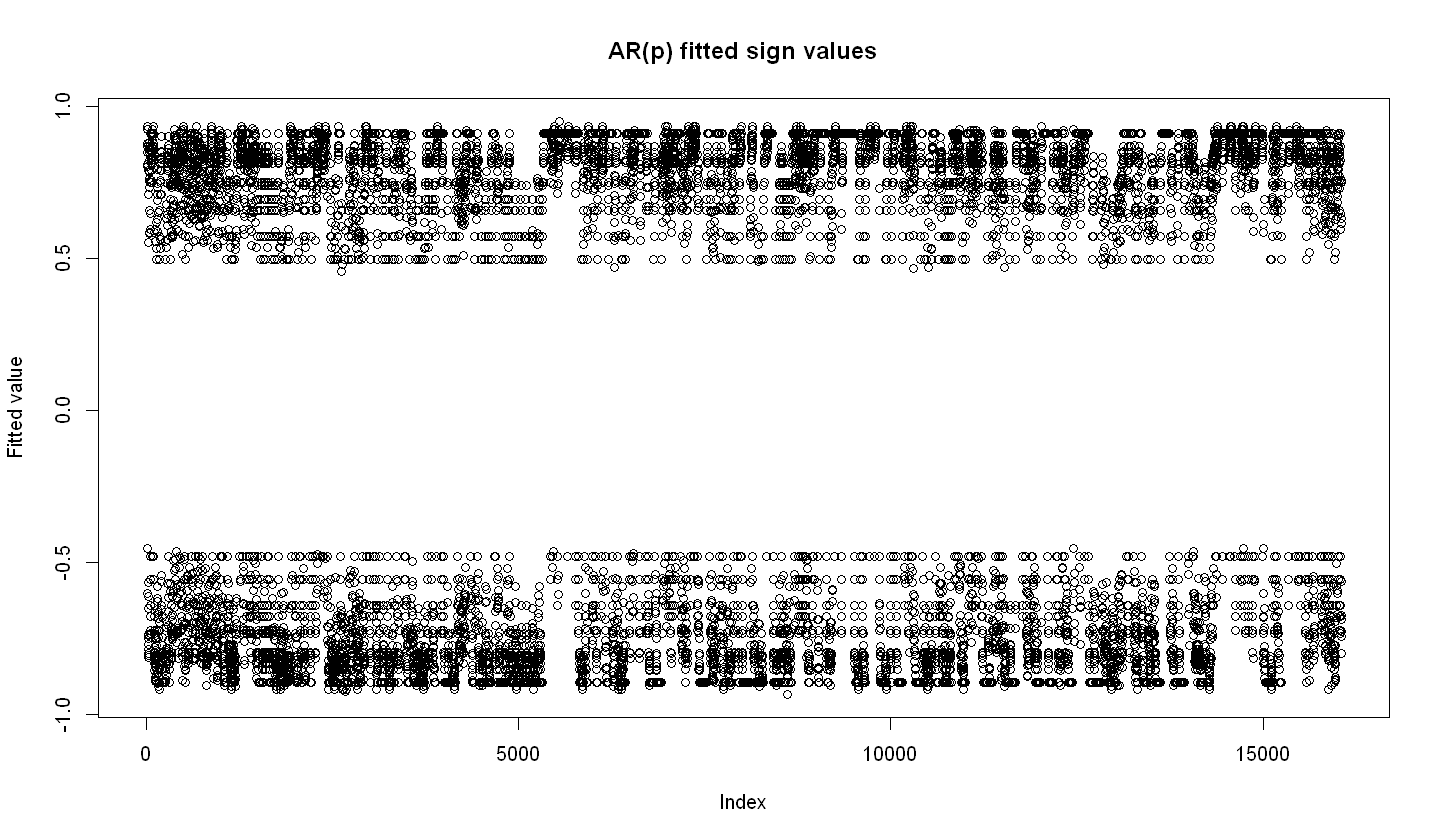

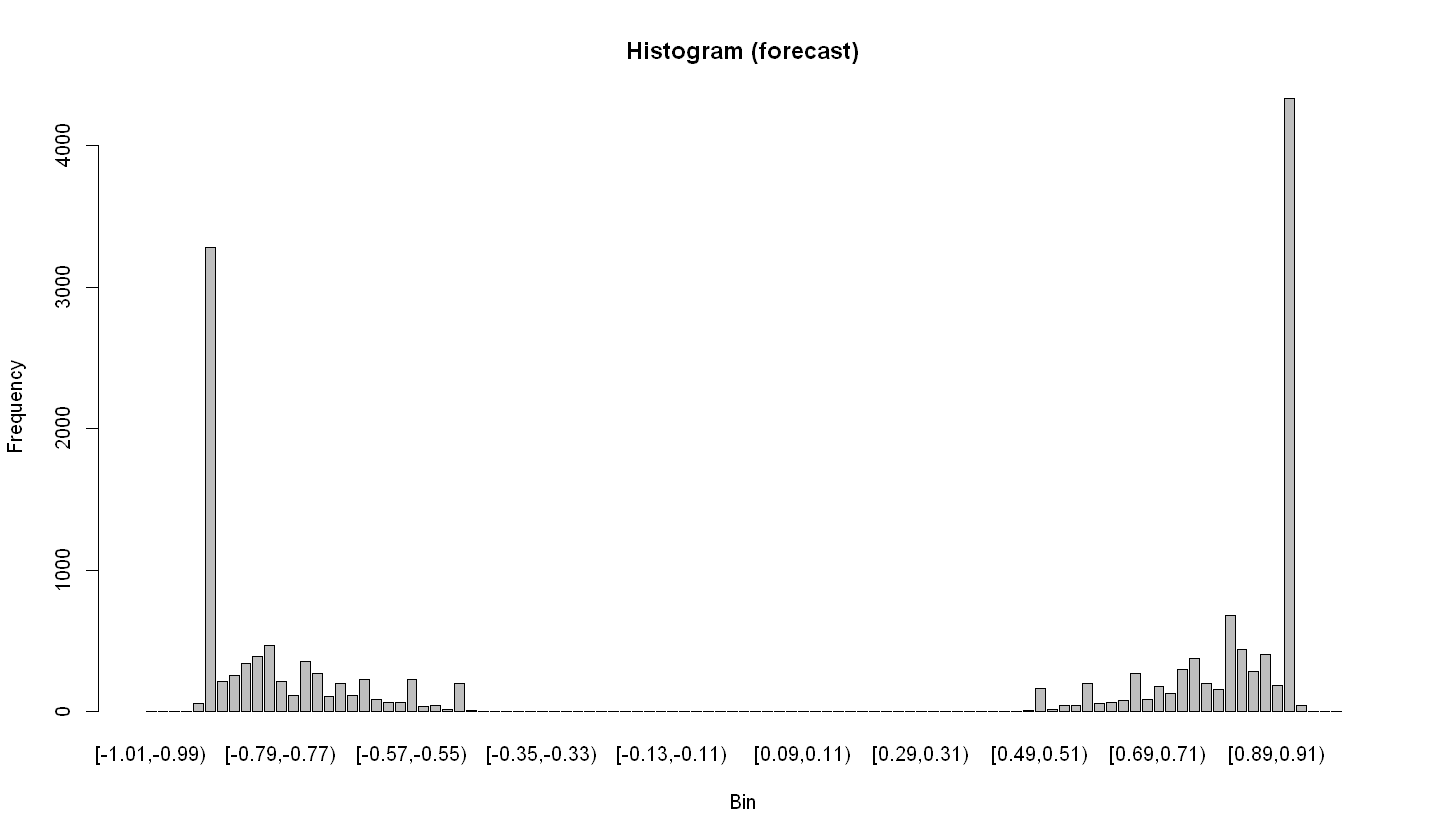

In [11]:
fitted <- tradeSign - fit2$resid
options(repr.plot.width=12)
plot(fitted, main="AR(p) fitted sign values", xlab="Index", ylab="Fitted value" )

# bin the data
bin_values <- seq(-1.01, 1.01, by = 0.02)
bins <- cut(fitted, bin_values, include.lowest = TRUE, right=FALSE)
plot(bins, main="Histogram (forecast)", xlab="Bin", ylab="Frequency")

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

The slope of the fitted line is very close to 1.


Call:
lm(formula = avg_forecast ~ avg_actual)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16014 -0.04057 -0.00190  0.02573  0.45677 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.00476    0.01348   0.353    0.725    
avg_actual   1.00020    0.01892  52.866   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09622 on 49 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.9828,	Adjusted R-squared:  0.9824 
F-statistic:  2795 on 1 and 49 DF,  p-value: < 2.2e-16


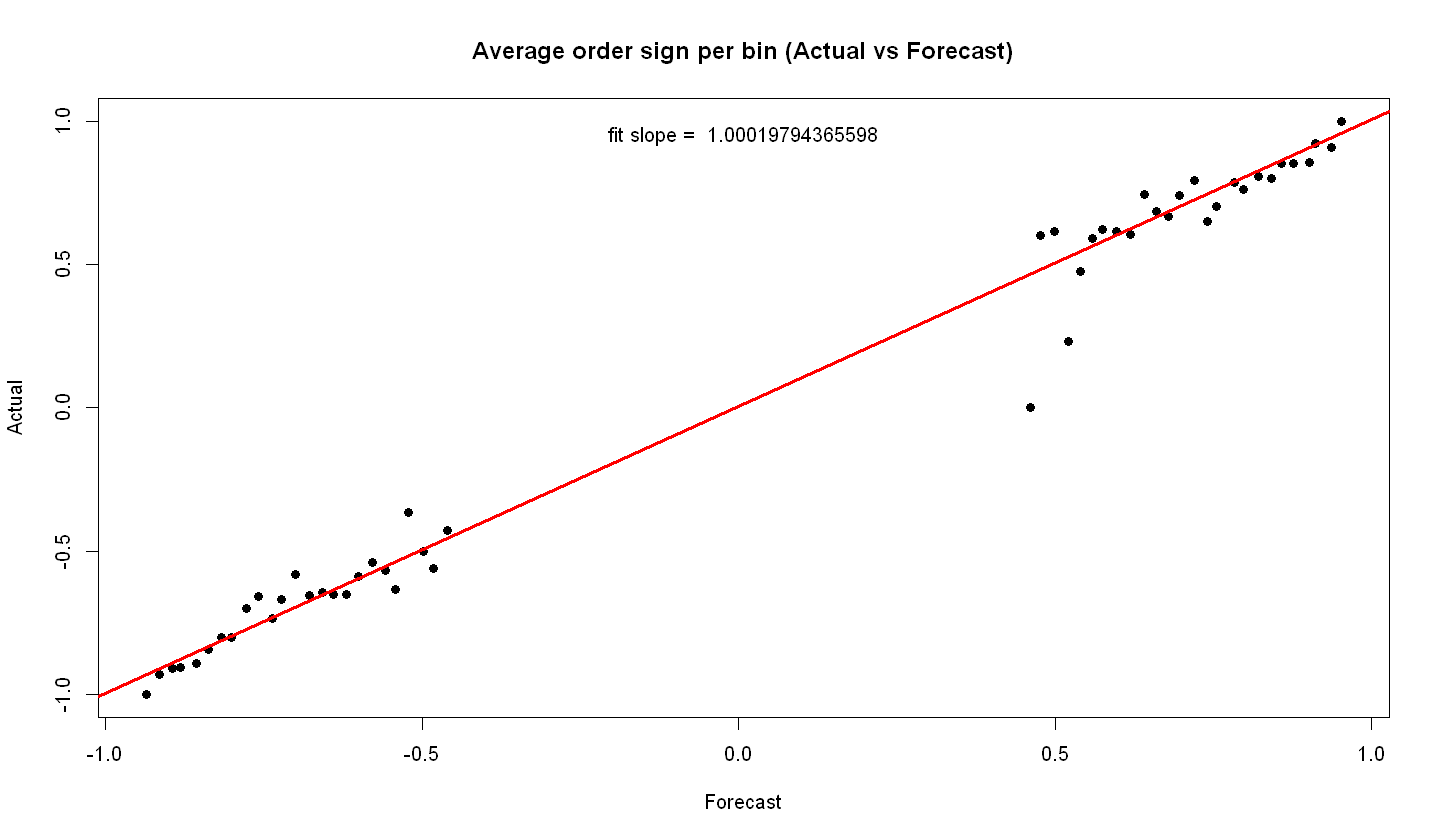

In [12]:
avg_forecast <- tapply(fitted, bins, mean)
avg_actual <- tapply(tradeSign, bins, mean)
fit_avg <- lm(avg_forecast ~ avg_actual)
plot(avg_forecast, avg_actual, main="Average order sign per bin (Actual vs Forecast)", 
     xlab="Forecast", ylab="Actual", pch=19)
abline(fit_avg, col='red', lwd=3)
slope_text <- paste("fit slope = ", fit_avg$coefficients[2])
mtext(slope_text, 3, -2)
summary(fit_avg)

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

According to Lecture 4 notes on the MRR model, the value of $p$ would depend on the value of $\hat \epsilon$. 

For the AR(1) representation we have
$$\hat \epsilon = \mathbb{E} [\epsilon_t|\epsilon_{t-1}]=\phi_1\,\epsilon_{t-1}.$$
If the previous sign is a buy, $p$ is the continuation probability $\gamma$ that the sign remains the same:
$$
\begin{align}
2\,\gamma-1 = \phi_1\\
\implies \gamma =& \frac{\phi_1 + 1}{2}\\
\implies \gamma =& \frac{1.821}{2}\\
\implies \gamma =& 0.9105
\end{align}
$$

If the previous sign is a sell, $p$ is the sign reversal probability $\pi$:
$$
\begin{align}
1-2\pi = \phi_1\\
\implies \pi =& \frac{1-\phi_1}{2}\\
\implies \pi =& \frac{0.179}{2}\\
\implies \pi =& 0.0895
\end{align}
$$



If we assume that buys and sells are equally possible then we get an unconditional probability of 0.5 for the next trade being a market buy. 